# EDA y Unificación de Datos

Este notebook realiza:
- Carga y limpieza de dos datasets (Provincias y Totales)
- Análisis descriptivo y visualizaciones
- Verificación de campos comunes para unificación
- Generación de tabla unificada
- Exportación del archivo limpio


In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

# Cargar archivos
prov_df = pd.read_csv('Internet Accesos Velocidad Rango Provincias.csv')
tot_df = pd.read_csv('Internet Accesos Velocidad Rango Totales.csv')

print('Provincias:', prov_df.shape)
print('Totales:', tot_df.shape)
prov_df.head()


Provincias: (1080, 12)
Totales: (45, 11)


,Año,Trimestre,Provincia,Hasta 512 kbps,'+ 512 Kbps - 1 Mbps,'+ 1 Mbps - 6 Mbps,'+ 6 Mbps - 10 Mbps,'+ 10 Mbps - 20 Mbps,'+ 20 Mbps - 30 Mbps,'+ 30 Mbps,Otros,Total
0,2025,1,Buenos Aires,644.0,20.448,172.059,132.611,220.036,123.678,4.554.422,66.998,5.290.896
1,2025,1,CABA,294.0,2.986,12.682,16.697,15.690,5.217,1.423.578,1.792,1.478.936
2,2025,1,Catamarca,71.0,124.000,2.384,2.591,3.340,2.766,67.675,66.000,79.017
3,2025,1,Chaco,236.0,226.000,11.319,7.270,4.231,10.740,128.061,5.578,167.661
4,2025,1,Chubut,104.0,306.000,30.828,10.200,13.511,21.478,102.157,6.137,184.721


## Limpieza de datos

In [4]:

# Eliminar columna vacía si existe
prov_df = prov_df.loc[:, ~prov_df.columns.str.contains('^Unnamed')]
tot_df = tot_df.loc[:, ~tot_df.columns.str.contains('^Unnamed')]

# Convertir separadores de miles y decimales
for col in prov_df.columns[4:]:
    prov_df[col] = prov_df[col].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

for col in tot_df.columns[3:]:
    tot_df[col] = tot_df[col].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Verificar tipos
print(prov_df.info())
print(tot_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Año                   1080 non-null   int64  
 1   Trimestre             1080 non-null   int64  
 2   Provincia             1080 non-null   object 
 3   Hasta 512 kbps        1080 non-null   float64
 4   '+ 512 Kbps - 1 Mbps  1080 non-null   float64
 5   '+ 1 Mbps - 6 Mbps    1080 non-null   float64
 6   '+ 6 Mbps - 10 Mbps   1080 non-null   float64
 7   '+ 10 Mbps - 20 Mbps  1080 non-null   float64
 8   '+ 20 Mbps - 30 Mbps  1080 non-null   float64
 9   '+ 30 Mbps            1080 non-null   float64
 10  Otros                 1080 non-null   float64
 11  Total                 1080 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 101.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Co

## Verificación de campos comunes

In [5]:

common_cols = set(prov_df.columns).intersection(set(tot_df.columns))
print('Campos comunes:', common_cols)


Campos comunes: {"'+ 20 Mbps - 30 Mbps", 'Año', "'+ 30 Mbps", "'+ 6 Mbps - 10 Mbps", "'+ 512 Kbps - 1 Mbps", 'Otros', 'Hasta 512 kbps', 'Trimestre', 'Total', "'+ 10 Mbps - 20 Mbps", "'+ 1 Mbps - 6 Mbps"}


## Análisis descriptivo

In [6]:

print(prov_df.describe())
print(tot_df.describe())


               Año    Trimestre  Hasta 512 kbps  '+ 512 Kbps - 1 Mbps  \
count  1080.000000  1080.000000     1080.000000           1080.000000   
mean   2019.133333     2.466667      125.284723           9022.988889   
std       3.251121     1.127958      177.000569          19315.624251   
min    2014.000000     1.000000        1.007000              0.000000   
25%    2016.000000     1.000000       18.000000           1319.750000   
50%    2019.000000     2.000000       58.000000           3484.000000   
75%    2022.000000     3.000000      129.000000           7773.250000   
max    2025.000000     4.000000      998.000000         171244.000000   

       '+ 1 Mbps - 6 Mbps  '+ 6 Mbps - 10 Mbps  '+ 10 Mbps - 20 Mbps  \
count        1.080000e+03          1080.000000           1080.000000   
mean         1.256236e+05         33286.435185          32824.246296   
std          3.114392e+05         57706.782310          80218.871923   
min          8.220000e+02             0.000000        

## Visualizaciones

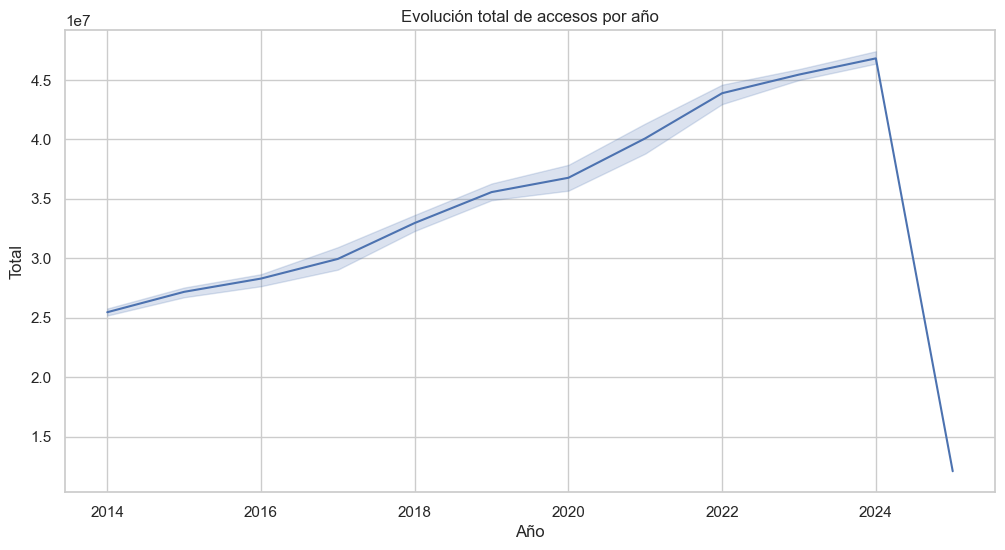

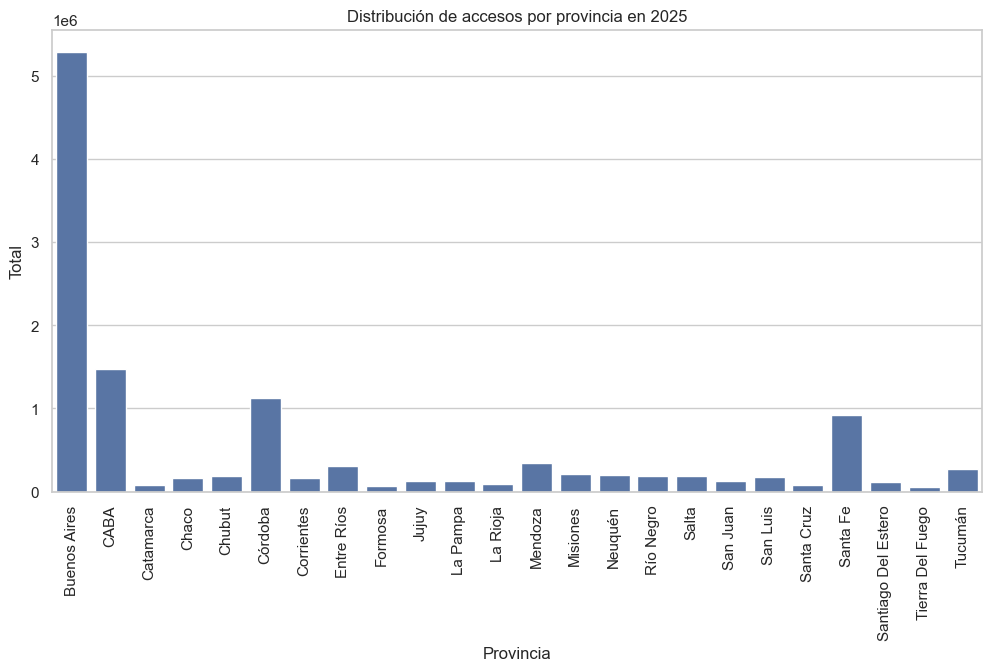

In [7]:

# Evolución total de accesos por año
sns.lineplot(x='Año', y='Total', data=tot_df, estimator='sum')
plt.title('Evolución total de accesos por año')
plt.show()

# Distribución por provincia (último año)
ultimo_anio = prov_df['Año'].max()
df_ultimo = prov_df[prov_df['Año'] == ultimo_anio]
sns.barplot(x='Provincia', y='Total', data=df_ultimo)
plt.xticks(rotation=90)
plt.title(f'Distribución de accesos por provincia en {ultimo_anio}')
plt.show()


## Unificación de tablas

In [8]:

# Unificar por Año y Trimestre
merged_df = prov_df.merge(tot_df, on=['Año','Trimestre'], suffixes=('_prov','_total'))
print('Dimensiones de la tabla unificada:', merged_df.shape)
merged_df.head()


Dimensiones de la tabla unificada: (1080, 21)


,Año,Trimestre,Provincia,Hasta 512 kbps_prov,'+ 512 Kbps - 1 Mbps_prov,'+ 1 Mbps - 6 Mbps_prov,'+ 6 Mbps - 10 Mbps_prov,'+ 10 Mbps - 20 Mbps_prov,'+ 20 Mbps - 30 Mbps_prov,'+ 30 Mbps_prov,...,Total_prov,Hasta 512 kbps_total,'+ 512 Kbps - 1 Mbps_total,'+ 1 Mbps - 6 Mbps_total,'+ 6 Mbps - 10 Mbps_total,'+ 10 Mbps - 20 Mbps_total,'+ 20 Mbps - 30 Mbps_total,'+ 30 Mbps_total,Otros_total,Total_total
0,2025,1,Buenos Aires,644.0,20448.0,172059.0,132611.0,220036.0,123678.0,4554422.0,...,5290896.0,3.082,54685.0,670937.0,502215.0,540061.0,371315.0,9699232.0,25009.0,12091617.0
1,2025,1,CABA,294.0,2986.0,12682.0,16697.0,1569.0,5217.0,1423578.0,...,1478936.0,3.082,54685.0,670937.0,502215.0,540061.0,371315.0,9699232.0,25009.0,12091617.0
2,2025,1,Catamarca,71.0,1240.0,2384.0,2591.0,334.0,2766.0,67675.0,...,79017.0,3.082,54685.0,670937.0,502215.0,540061.0,371315.0,9699232.0,25009.0,12091617.0
3,2025,1,Chaco,236.0,2260.0,11319.0,727.0,4231.0,1074.0,128061.0,...,167661.0,3.082,54685.0,670937.0,502215.0,540061.0,371315.0,9699232.0,25009.0,12091617.0
4,2025,1,Chubut,104.0,3060.0,30828.0,102.0,13511.0,21478.0,102157.0,...,184721.0,3.082,54685.0,670937.0,502215.0,540061.0,371315.0,9699232.0,25009.0,12091617.0


## Guardar archivo unificado

In [ ]:

output_file = 'Internet_Accesos_Unificado.csv'
merged_df.to_csv(output_file, sep=',', encoding='utf-8', index=False, float_format='%.2f')
print(f'Archivo guardado como: {output_file}')
